# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#display graphs
%matplotlib inline

# Import Data

In [3]:
path = r'/Users/docopeland/Documents/data analysis/career foundry/06 Open Data'

In [4]:
wdiBefore = pd.read_pickle(os.path.join(path,'data','prepared data','wdi_short.pkl'))

In [5]:
wdiBefore.head()

Indicator Name,Country Name,year,CPI human resources,CPIA gender equality,CPIA social protection,employers,management,fertility rate,intentional homicides,labor force,literacy rate,poverty gap,parliment seats,unpaid domestic,gender parity index,primary enrollment,teenage mothers,married by 18
30,Afghanistan,1990.0,NaN,NaN,NaN,NaN,NaN,7.466,NaN,15.180,NaN,NaN,NaN,NaN,0.54850,NaN,NaN,NaN
31,Afghanistan,1991.0,NaN,NaN,NaN,0.05,NaN,7.479,NaN,15.214,NaN,NaN,NaN,NaN,0.54788,NaN,NaN,NaN
32,Afghanistan,1992.0,NaN,NaN,NaN,0.05,NaN,7.502,NaN,15.223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Afghanistan,1993.0,NaN,NaN,NaN,0.05,NaN,7.535,NaN,15.197,NaN,NaN,NaN,NaN,0.35307,13.69764,NaN,NaN
34,Afghanistan,1994.0,NaN,NaN,NaN,0.05,NaN,7.572,NaN,15.178,NaN,NaN,NaN,NaN,0.50580,NaN,NaN,NaN


In [6]:
#removing country, year, CPIA columns
wdi = wdiBefore.drop(columns = ['Country Name','year','CPI human resources','CPIA gender equality','CPIA social protection'])

In [7]:
wdi.describe()

Indicator Name,employers,management,fertility rate,intentional homicides,labor force,literacy rate,poverty gap,parliment seats,unpaid domestic,gender parity index,primary enrollment,teenage mothers,married by 18
count,5423.000000,1015.000000,6184.000000,2076.000000,5984.000000,848.000000,1711.000000,4519.000000,177.000000,4674.000000,2237.000000,340.000000,502.000000
mean,1.740769,30.702660,3.123984,2.346668,50.331091,78.505126,15.119170,17.455378,17.854483,0.956685,83.682046,19.133765,27.763798
std,1.518537,8.761745,1.645491,2.624447,16.487506,23.466398,19.327297,11.581918,4.094182,0.093395,17.062861,10.539359,16.935591
min,0.000000,4.220000,0.837000,0.000000,5.995000,4.591830,0.000000,0.000000,5.020510,0.000000,13.697640,1.600000,0.000000
25%,0.600000,24.750000,1.796000,0.704246,41.106749,65.782272,0.700000,8.849558,15.416670,0.953572,80.634270,9.975000,14.900000
50%,1.450000,31.459999,2.562500,1.339728,51.061998,89.714130,6.600000,15.500000,17.295710,0.985490,89.690320,18.050000,25.500000
75%,2.425000,36.625000,4.321000,3.062671,60.759500,95.079941,22.600000,24.522178,20.058330,1.000087,94.891170,26.450000,38.050000
max,10.870000,60.910000,8.606000,19.171229,90.555000,99.999947,100.000000,63.750000,31.040810,1.253070,99.989950,46.400000,83.500000


In [8]:
#replace the NaNs with the mean values
wdi['employers'].fillna(1.74, inplace=True)
wdi['management'].fillna(30.70, inplace=True)
wdi['fertility rate'].fillna(3.12, inplace=True)
wdi['intentional homicides'].fillna(2.35, inplace=True)
wdi['labor force'].fillna(50.33, inplace=True)
wdi['literacy rate'].fillna(78.51, inplace=True)
wdi['poverty gap'].fillna(15.12, inplace=True)
wdi['parliment seats'].fillna(17.46, inplace=True)
wdi['unpaid domestic'].fillna(17.85, inplace=True)
wdi['gender parity index'].fillna(0.96, inplace=True)
wdi['primary enrollment'].fillna(83.68, inplace=True)
wdi['teenage mothers'].fillna(19.14, inplace=True)
wdi['married by 18'].fillna(27.76, inplace=True)

In [9]:
wdi.head()

Indicator Name,employers,management,fertility rate,intentional homicides,labor force,literacy rate,poverty gap,parliment seats,unpaid domestic,gender parity index,primary enrollment,teenage mothers,married by 18
30,1.74,30.7,7.466,2.35,15.180,78.51,15.12,17.46,17.85,0.54850,83.68000,19.14,27.76
31,0.05,30.7,7.479,2.35,15.214,78.51,15.12,17.46,17.85,0.54788,83.68000,19.14,27.76
32,0.05,30.7,7.502,2.35,15.223,78.51,15.12,17.46,17.85,0.96000,83.68000,19.14,27.76
33,0.05,30.7,7.535,2.35,15.197,78.51,15.12,17.46,17.85,0.35307,13.69764,19.14,27.76
34,0.05,30.7,7.572,2.35,15.178,78.51,15.12,17.46,17.85,0.50580,83.68000,19.14,27.76


# Elbow technique

In [10]:
#defining k-means clusters
kmeans = [KMeans(n_clusters = i) for i in range(1,15)]

In [11]:
#creating scores based on k num of clusters
score = [kmeans[i].fit(wdi).score(wdi) for i in range(len(kmeans))]

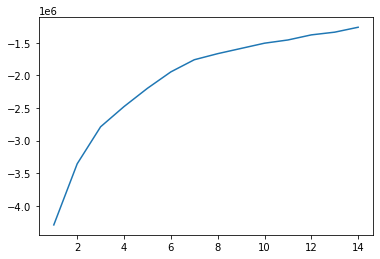

In [12]:
#plot the elbow
pl.plot(range(1,15),score)

In [13]:
#it's hard to see where the bend is (6?) so I'm going to find the derivative so i can see the slope of the line

In [14]:
#find the next value in the seq
score1 = [0]
for i in range(len(score)-1):
    score1.append(score[i])

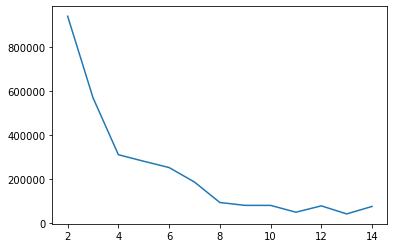

In [15]:
#finding and plotting the slope of the line (y1-y0)/(x1-x0), in this case it will (y1-y0)/1 = (y1-y0)
diffs = []
for i in range(len(score)):
    diffs.append(score[i]-score1[i])
pl.plot(range(2,15),diffs[1:])

In [16]:
#at about 6, the y values stay around the same value for a bit, meaning that the slope starts to get flatter
#so 6 should be the number of clusters

# KMeans

In [17]:
#create kmeans object
kmeans = KMeans(n_clusters = 6) 

In [18]:
kmeans.fit(wdi)

KMeans(n_clusters=6)

In [19]:
wdi['clusters'] = kmeans.fit_predict(wdi)

In [20]:
wdi['clusters'].value_counts()

1    3402
0    1132
2    1108
3     843
4     240
5     214
Name: clusters, dtype: int64

In [21]:
#adding colors to the graphs to make it easier to see since i have 6 clusters
colors = ['red','orange','yellow','green','blue','purple']

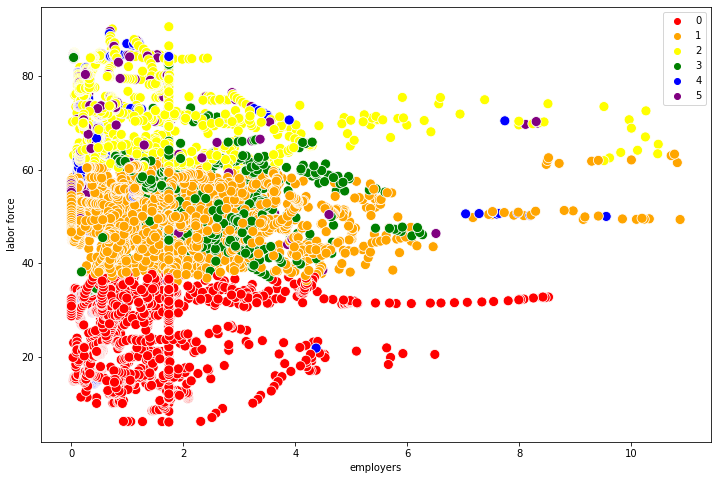

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['employers'], y=wdi['labor force'], hue=kmeans.labels_,palette=colors, s=100) 

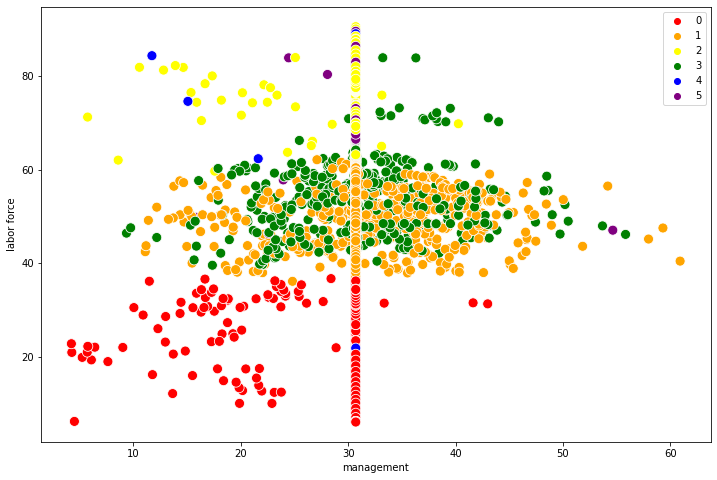

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['management'], y=wdi['labor force'], hue=kmeans.labels_,palette=colors,s=100) 

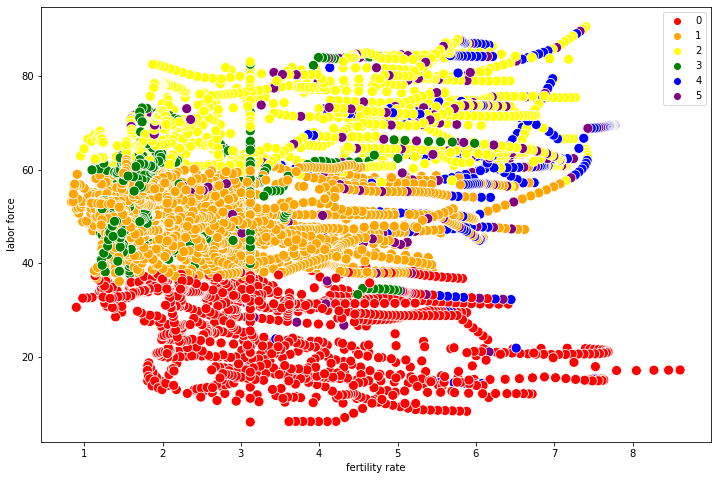

In [24]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['fertility rate'], y=wdi['labor force'], hue=kmeans.labels_,palette=colors, s=100) 

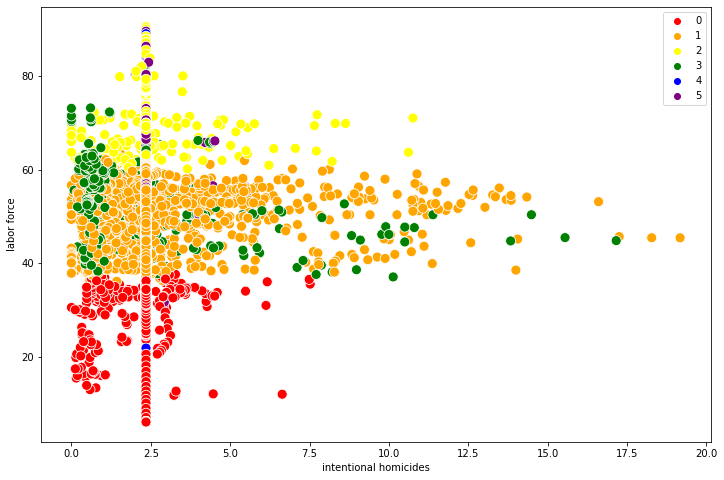

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['intentional homicides'], y=wdi['labor force'], hue=kmeans.labels_,palette=colors, s=100) 

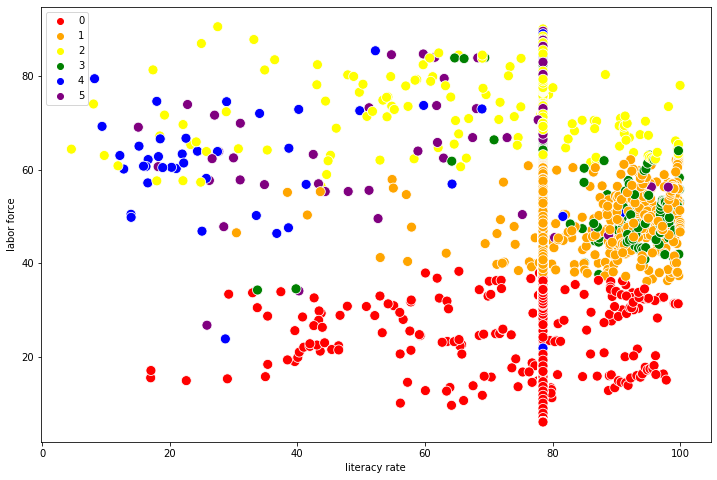

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['literacy rate'], y=wdi['labor force'], hue=kmeans.labels_, palette=colors,s=100) 

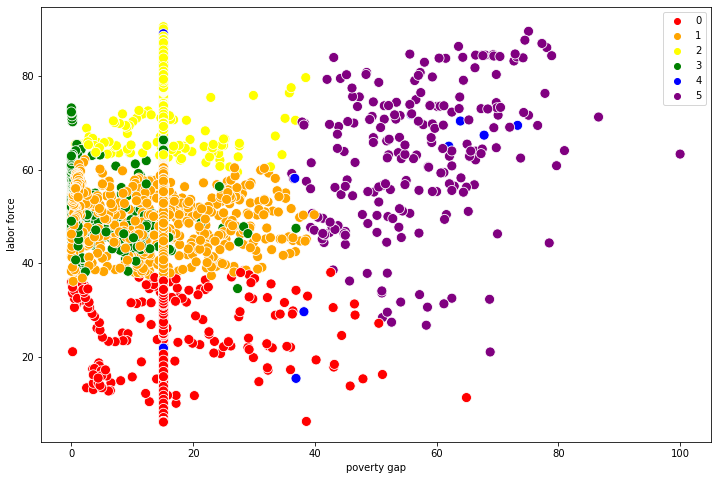

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['poverty gap'], y=wdi['labor force'], hue=kmeans.labels_,palette=colors, s=100) 

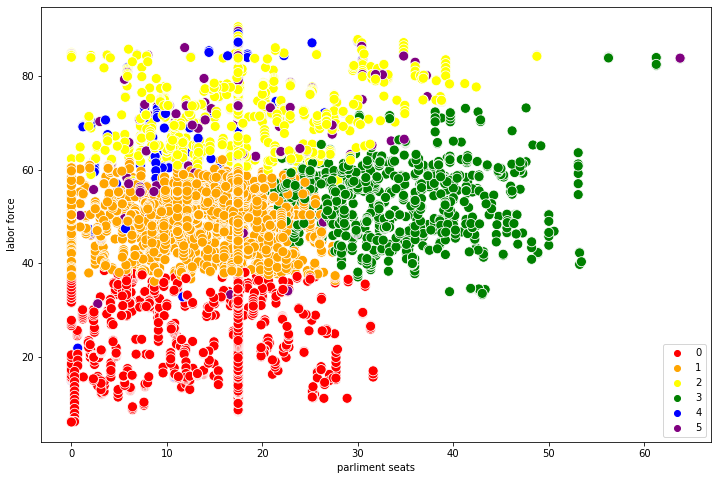

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['parliment seats'], y=wdi['labor force'], hue=kmeans.labels_, palette=colors,s=100) 

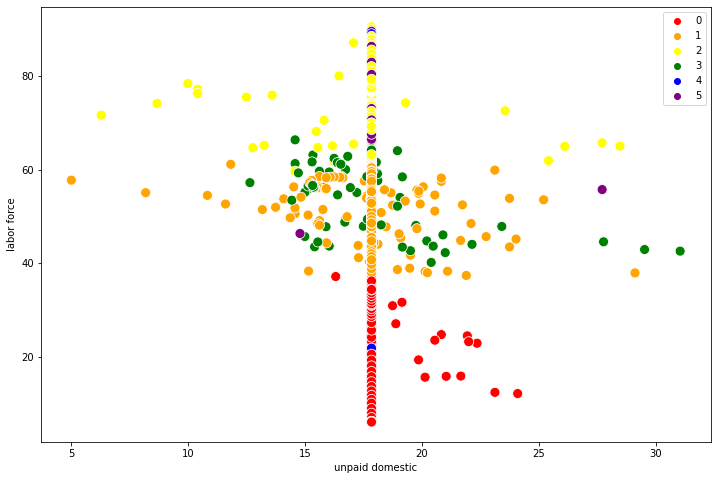

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['unpaid domestic'], y=wdi['labor force'], hue=kmeans.labels_,palette=colors, s=100) 

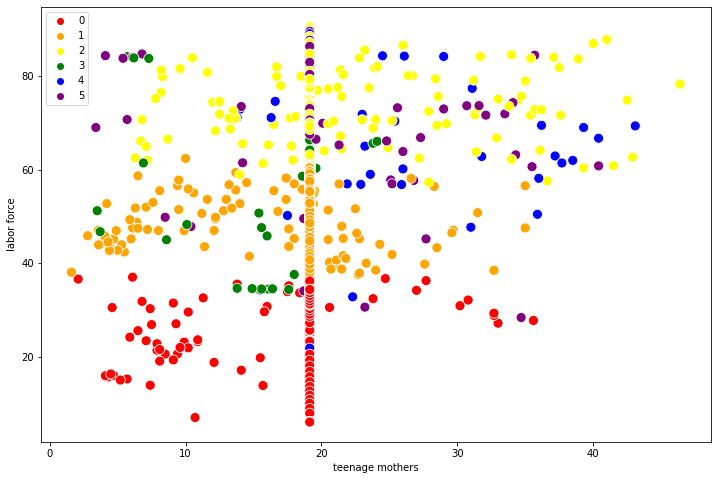

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['teenage mothers'], y=wdi['labor force'], hue=kmeans.labels_, palette=colors,s=100) 

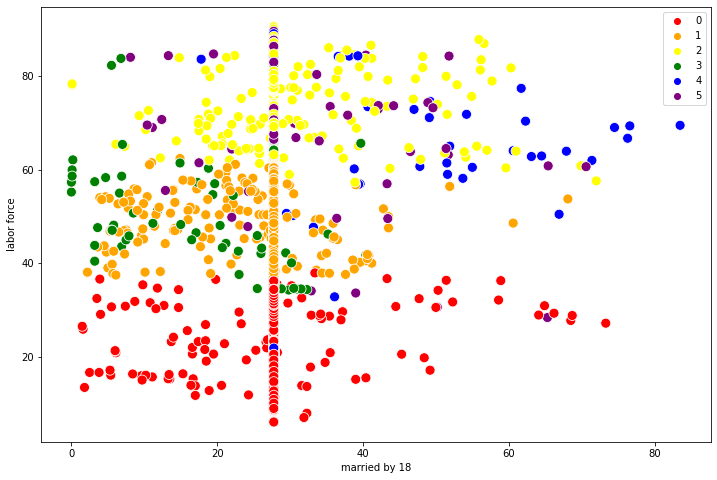

In [31]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=wdi['married by 18'], y=wdi['labor force'], hue=kmeans.labels_,palette=colors, s=100) 

In [32]:
#my clusters seem to be based on labor force
#the clusters are more obvious in some scatterplots than others

In [33]:
wdi.columns

Index(['employers', 'management', 'fertility rate', 'intentional homicides',
       'labor force', 'literacy rate', 'poverty gap', 'parliment seats',
       'unpaid domestic', 'gender parity index', 'primary enrollment',
       'teenage mothers', 'married by 18', 'clusters'],
      dtype='object', name='Indicator Name')

In [34]:
wdi.groupby('clusters').agg({'employers':['mean'],'management':['mean'],'fertility rate':['mean'],
                             'intentional homicides':['mean'],'labor force':['mean'],'literacy rate':['mean'],
                             'poverty gap':['mean'],'parliment seats':['mean'],'unpaid domestic':['mean'],
                             'gender parity index':['mean'],'primary enrollment':['mean'],
                             'teenage mothers':['mean'],'married by 18':['mean']})

Indicator Name,employers,management,fertility rate,intentional homicides,labor force,literacy rate,poverty gap,parliment seats,unpaid domestic,gender parity index,primary enrollment,teenage mothers,married by 18
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,,,
0,1.517482,29.804072,3.567386,2.253091,25.571377,77.485108,15.457633,14.106177,17.887975,0.948409,83.243465,18.868569,27.577149
1,1.896875,31.016940,2.596672,2.448076,49.606034,79.809189,13.991558,14.709826,17.845163,0.974160,85.766336,19.022093,27.482449
2,1.421742,30.436516,4.135580,2.395515,70.668055,76.892503,15.111318,17.514377,17.818075,0.938921,83.894323,19.562419,28.351881
3,2.246821,31.042811,2.105865,1.995979,53.380471,80.292859,8.285386,34.429781,17.853362,0.986031,87.470339,18.989063,27.026269
4,0.910292,30.517958,5.923800,2.350000,61.670125,70.523805,16.543833,13.125105,17.850000,0.791075,45.707913,20.203083,31.208401
5,1.024486,30.631308,4.780294,2.430081,62.799519,73.566669,56.637850,16.555010,17.881776,0.919846,79.388383,19.655514,29.106907


In [35]:
#the columns that have different means 
#the cluster with the lowest labor force has lowest teenage mothers, lowest management, and average everything else
#the cluster with the highest labor force has average everything

In [36]:
#these clusters make me think that I should add region to my analysis
#the different clusters are very different to each other so my recommendations should be by region instead of for
#all countries

In [37]:
#export pkl
wdi.to_pickle(os.path.join(path,'data','prepared data','wdi_clustered.pkl'))